Illustrate some issues with tops2vrt and geocoding

In [1]:
import xarray as xr
from contrib.experiments import *
from contrib import *
from contrib.plotting import plotFringe
from mintpy.view import viewer

%pdb off
%matplotlib inline


print ('\nData is at:', os.getenv('dataroot'))
print (os.getenv('CONDA_PROMPT_MODIFIER'), datetime.now().date())

Automatic pdb calling has been turned OFF

Data is at: /u/leffe-data2/buzzanga/data/
(FRInGE)  2022-07-27


In [2]:
ExpNYC = ExpBase(NYC_Base)
ExpHR  = ExpBase(HR_Base2)

Got 136 wrapped ifgs (SR)
Got 0 unwrapped ifgs
Got 0 wrapped ifgs (SR)
Got 0 unwrapped ifgs


# Cropping

## Corner out of bounds

### Show missing corners

- tops2vrt.py uses two corners of a bounding box to subset a region. 
- For NYC, only one corner exists.

Area: 1.96º


(<Figure size 1008x576 with 1 Axes>, <GeoAxesSubplot:>)

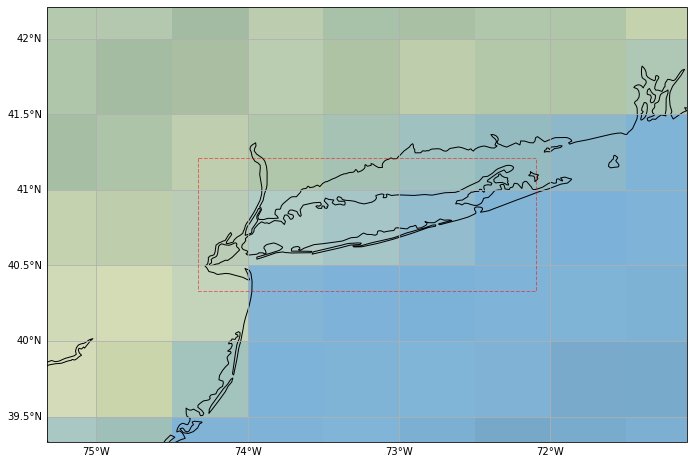

In [19]:
bbPlot.plot_bbox('NYC')

In [ ]:
geom   = 'lon.rdr.full' # lat.rdr.full lon.rdr.full hgt
path_geom0 = op.join('merged', 'geom_reference', geom)

/u/leffe-data2/buzzanga/Miniconda3/envs/FRInGE/lib/python3.9/site-packages/rioxarray/_io.py:841: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))


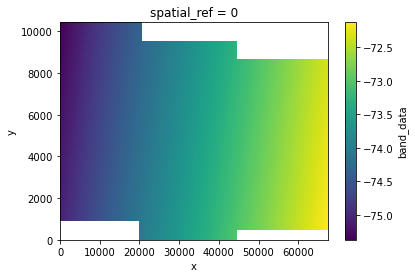

In [26]:
## New York Lats; SE is inf 
path_coord = op.join(ExpNYC.path_wd, path_geom0)
ds         = xr.open_dataset(path_coord, engine='rasterio')
dat        = ds['band_data'].squeeze().drop('band').astype(np.float32)
dat.plot()
# del ds

Area: 0.35º


(<Figure size 1008x576 with 1 Axes>, <GeoAxesSubplot:>)

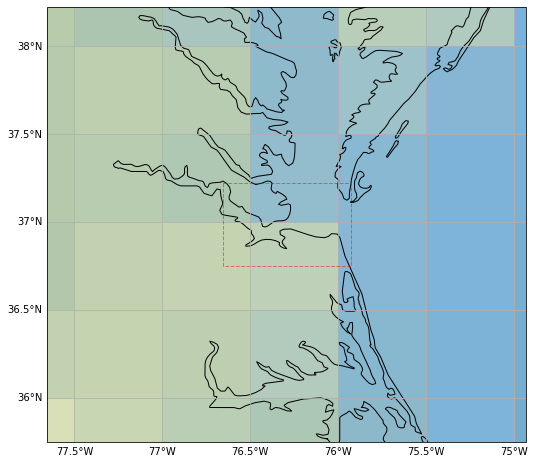

In [24]:
bbPlot.plot_bbox('HR')

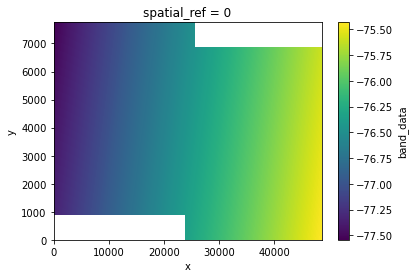

In [20]:
## Hampton Roads lats seem ok
# Lats
path_coord = op.join(ExpHR.path_wd, path_geom0)
ds1        = xr.open_dataset(path_coord, engine='rasterio')
dat1       = ds1['band_data'].squeeze().drop('band').astype(np.float32)
dat1.plot()
del ds1

### Geocode and subset by bbox a dataset with MintPy

- This works, but not sure how to trick it into doing a stack of SLC vrts

In [27]:
# force the bigger (original) bbox
SNWE  = [40.3341, 41.2099, -74.3259, -72.1531]
SNWEs = ' '.join([str(i) for i in SNWE])

path_geom = op.join(ExpNYC.path_wd, 'merged/geom_reference')
path_hgt  = op.join(path_geom, 'hgt.rdr.full')
path_hgts = op.join(ExpNYC.path_wd, 'geom_tests') # temp path for storing

In [28]:
## geocode the FULL heights (DEM) file
cmd  = f'geocode.py {path_hgt} -o {path_hgts}/hgt.h5 '
cmd += f'--lat-file {path_geom}/lat.rdr.full --lon-file {path_geom}/lon.rdr.full'
print (cmd)
!{cmd}

geocode.py /u/leffe-data2/buzzanga/data/VLM/Sentinel1/NYC/merged/geom_reference/hgt.rdr.full -o /u/leffe-data2/buzzanga/data/VLM/Sentinel1/NYC/geom_tests/hgt.h5 --lat-file /u/leffe-data2/buzzanga/data/VLM/Sentinel1/NYC/merged/geom_reference/lat.rdr.full --lon-file /u/leffe-data2/buzzanga/data/VLM/Sentinel1/NYC/merged/geom_reference/lon.rdr.full
No lookup table info range/lat found in files.
number of processor to be used: 1
resampling software: pyresample
read latitude / longitude from lookup table file: /u/leffe-data2/buzzanga/data/VLM/Sentinel1/NYC/merged/geom_reference/lat.rdr.full
output pixel size in (lat, lon) in degree: (-0.00013003515749083748, 4.8089428820936835e-05)
output area extent in (S, N, W, E) in degree: (40.11120207226501, 41.46733872973695, -75.37355920096441, -72.12882117012934)
output file row / column number: (10429, 67473)
split along y dimension (10429) into 3 boxes
    with each box up to 3477 in y dimension
preparing geometry for dest_box 1/3: [0, 0, 67473, 34

run view.py in MintPy version v1.3.3-36, date 2022-07-14
input file is hgt file: /u/leffe-data2/buzzanga/data/VLM/Sentinel1/NYC/geom_tests/hgt.h5 in float64 format
file size in y/x: (10429, 67473)
num of datasets in file hgt.h5: 1
datasets to exclude (0):
[]
datasets to display (1):
['band1']
data   coverage in y/x: (0, 0, 67473, 10429)
subset coverage in y/x: (0, 0, 67473, 10429)
data   coverage in lat/lon: (-75.37355920096441, 41.46733872973695, -72.12882117012933, 40.11120207226501)
subset coverage in lat/lon: (-75.37355920096441, 41.46733872973695, -72.12882117012933, 40.11120207226501)
------------------------------------------------------------------------
colormap: jet
figure title: hgt
figure size : [10.00, 3.34]
reading data ...
masking pixels with NO_DATA_VALUE of 0.0
data    range: [-499.99999998941416, 508.97613285172645] m
display range: [-499.99999998941416, 508.97613285172645] m
display data in transparency: 1.0
plot in geo-coordinate
plotting image ...
plot scale bar: [

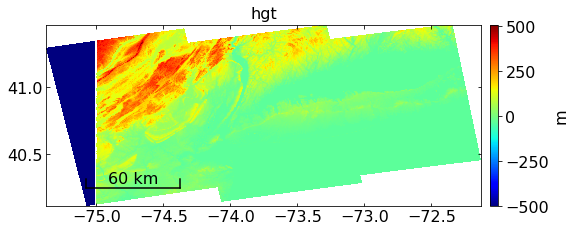

In [29]:
cmd = f'view.py {path_hgts}/hgt.h5'

obj = viewer(cmd)
obj.configure(); obj.plot()


In [30]:
## geocode the heights, subsetting by bbox file
cmd  = f'geocode.py {path_hgt} -o {path_hgts}/hgt_subset.h5 '
cmd += f'--lat-file {path_geom}/lat.rdr.full --lon-file {path_geom}/lon.rdr.full -b {SNWEs}'
print (cmd)
!{cmd}

geocode.py /u/leffe-data2/buzzanga/data/VLM/Sentinel1/NYC/merged/geom_reference/hgt.rdr.full -o /u/leffe-data2/buzzanga/data/VLM/Sentinel1/NYC/geom_tests/hgt_subset.h5 --lat-file /u/leffe-data2/buzzanga/data/VLM/Sentinel1/NYC/merged/geom_reference/lat.rdr.full --lon-file /u/leffe-data2/buzzanga/data/VLM/Sentinel1/NYC/merged/geom_reference/lon.rdr.full -b 40.3341 41.2099 -74.3259 -72.1531
No lookup table info range/lat found in files.
number of processor to be used: 1
resampling software: pyresample
read latitude / longitude from lookup table file: /u/leffe-data2/buzzanga/data/VLM/Sentinel1/NYC/merged/geom_reference/lat.rdr.full
output pixel size in (lat, lon) in degree: (-0.00013003515749083748, 4.8089428820936835e-05)
output area extent in (S, N, W, E) in degree: (40.33411321429921, 41.2099, -74.3259, -72.15312342701243)
output file row / column number: (6735, 45182)
split along y dimension (6735) into 3 boxes
    with each box up to 2245 in y dimension
preparing geometry for dest_box

run view.py in MintPy version v1.3.3-36, date 2022-07-14
input file is hgt file: /u/leffe-data2/buzzanga/data/VLM/Sentinel1/NYC/geom_tests/hgt_subset.h5 in float64 format
file size in y/x: (6735, 45182)
num of datasets in file hgt_subset.h5: 1
datasets to exclude (0):
[]
datasets to display (1):
['band1']
data   coverage in y/x: (0, 0, 45182, 6735)
subset coverage in y/x: (0, 0, 45182, 6735)
data   coverage in lat/lon: (-74.3259, 41.2099, -72.15312342701243, 40.33411321429921)
subset coverage in lat/lon: (-74.3259, 41.2099, -72.15312342701243, 40.33411321429921)
------------------------------------------------------------------------
colormap: jet
figure title: hgt_subset
figure size : [10.00, 3.22]
reading data ...
masking pixels with NO_DATA_VALUE of 0.0
data    range: [-115.52488048520954, 374.97455106307734] m
display range: [-115.52488048520954, 374.97455106307734] m
display data in transparency: 1.0
plot in geo-coordinate
plotting image ...
plot scale bar: [0.2, 0.2, 0.1]
showing

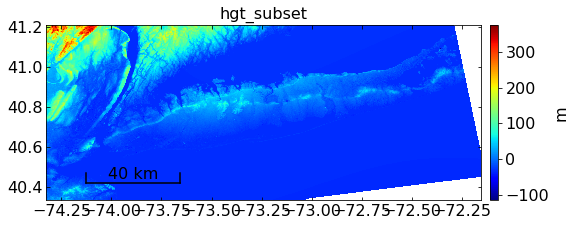

In [31]:
cmd = f'view.py {path_hgts}/hgt_subset.h5'

obj = viewer(cmd)
obj.configure(); obj.plot()

### Make a fake geometryRadar.h5 to use for coords.utils

- I can make the geom, but the lower right corner of my bbox is nan
- So i cant grab the pixel coordinate

In [4]:
from mintpy.utils import isce_utils, readfile, writefile, utils as ut
outfile      = op.join(ExpNYC.path_wd, 'geometryRadar_MP.h5') 
meta_file    = op.join(ExpNYC.path_wd, 'reference', 'IW2.xml')
geom_src_dir = op.join(ExpNYC.path_wd, 'merged', 'geom_reference')

In [6]:
## hacked from prepare_geometry in prep_fringe
# extract metadata from ISCE to MintPy (ROIPAC) format
meta = isce_utils.extract_isce_metadata(meta_file, update_mode=False)[0]
meta = isce_utils.extract_geometry_metadata(geom_src_dir, meta=meta, box=None, fext_list=['.rdr.full'])
meta = {key : value for key, value in meta.items()}
meta['FILE_TYPE'] = 'geometry'

fDict = {
    'latitude'       : os.path.join(geom_src_dir, 'lat.rdr.full'),
    'longitude'      : os.path.join(geom_src_dir, 'lon.rdr.full'),
}

# initiate dsDict
dsDict = {}
for dsName, fname in fDict.items():
    dsDict[dsName] = readfile.read(fname, datasetName=dsName, box=None)[0]

dsDict['slantRangeDistance'] = ut.range_distance(meta, dimension=2)

# write data to HDF5 file
writefile.write(dsDict, outfile, metadata=meta)

extract metadata from ISCE/topsStack xml file: /u/leffe-data2/buzzanga/data/VLM/Sentinel1/NYC/reference/IW2.xml
This is the Open Source version of ISCE.
Some of the workflows depend on a separate licensed package.
To obtain the licensed package, please make a request for ISCE
through the website: https://download.jpl.nasa.gov/ops/request/index.cfm.
Alternatively, if you are a member, or can become a member of WinSAR
you may be able to obtain access to a version of the licensed sofware at
https://winsar.unavco.org/software/isce
extract metadata from geometry files: ['hgt.rdr.full', 'lat.rdr.full', 'lon.rdr.full', 'los.rdr.full']
near   range : 847525.22 m
center range : 926115.32 m
far    range : 1004705.43 m
create HDF5 file: /u/leffe-data2/buzzanga/data/VLM/Sentinel1/NYC/geometryRadar_MP.h5 with w mode
create dataset /latitude           of float64    in size of (10429, 67473)       with compression=None
create dataset /longitude          of float64    in size of (10429, 67473)       w

'/u/leffe-data2/buzzanga/data/VLM/Sentinel1/NYC/geometryRadar_MP.h5'

In [7]:
atr = readfile.read_attribute(outfile)
coord = ut.coordinate(atr, lookup_file=outfile)
coord.open()

In [8]:
# get lower right and upper left points
bbox   = []
for lalo in [(ExpNYC.SNWE[0], ExpNYC.SNWE[-1]), (ExpNYC.SNWE[1], ExpNYC.SNWE[2])]:
    yx =  coord.geo2radar(*lalo)[0:2]
    bbox.extend(yx)

In [10]:
# get lower right and upper left geo from the radar
bbox   = []
for yx in [(0, 67472), (10428, 0)]:
    lalo =  coord.radar2geo(*yx)[0:2]
    print (lalo)
    bbox.extend(lalo)

# can't get the southeast corner

(0.0, 0.0)
(41.28954968056218, -75.37353641602468)


## Lose eastern shore

- notice how the eastern shore (apparent in the full) is missing in the crop
    - this is due to the xmax not stretching far enoughf (resulting from gdal.Transformer())
- in the ARIA product, the same bbox contains the eastern shore

In [ ]:
%matplotlib inline

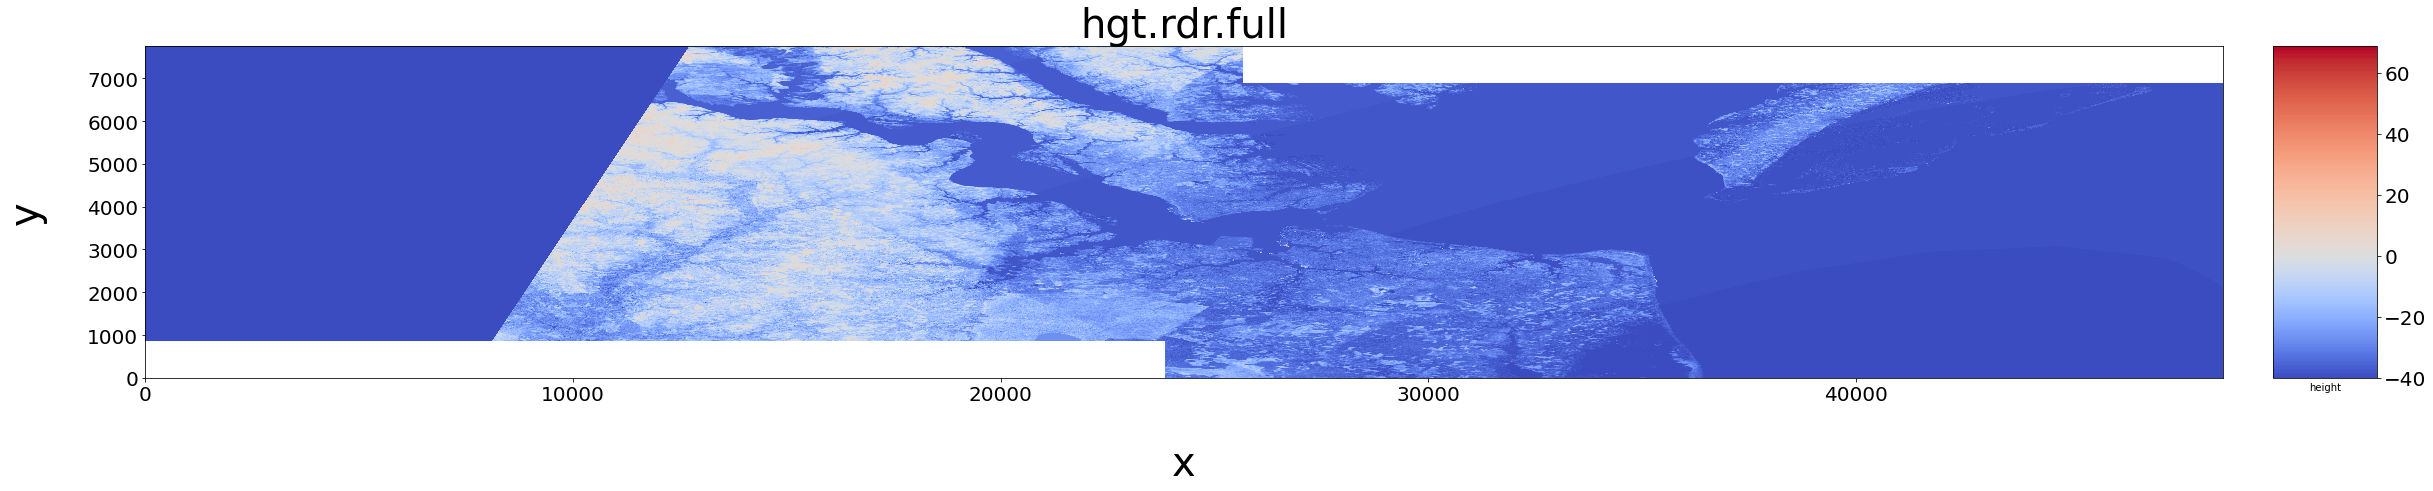

In [11]:
cmd  = f'plotFringe.py {ExpHR.path_wd}/merged/geom_reference/hgt.rdr.full.vrt --vmin -40'
# plotFringe.configure(cmd, (10, 10), 30);
f, a = plotFringe.configure(cmd, (40, 40), 40);

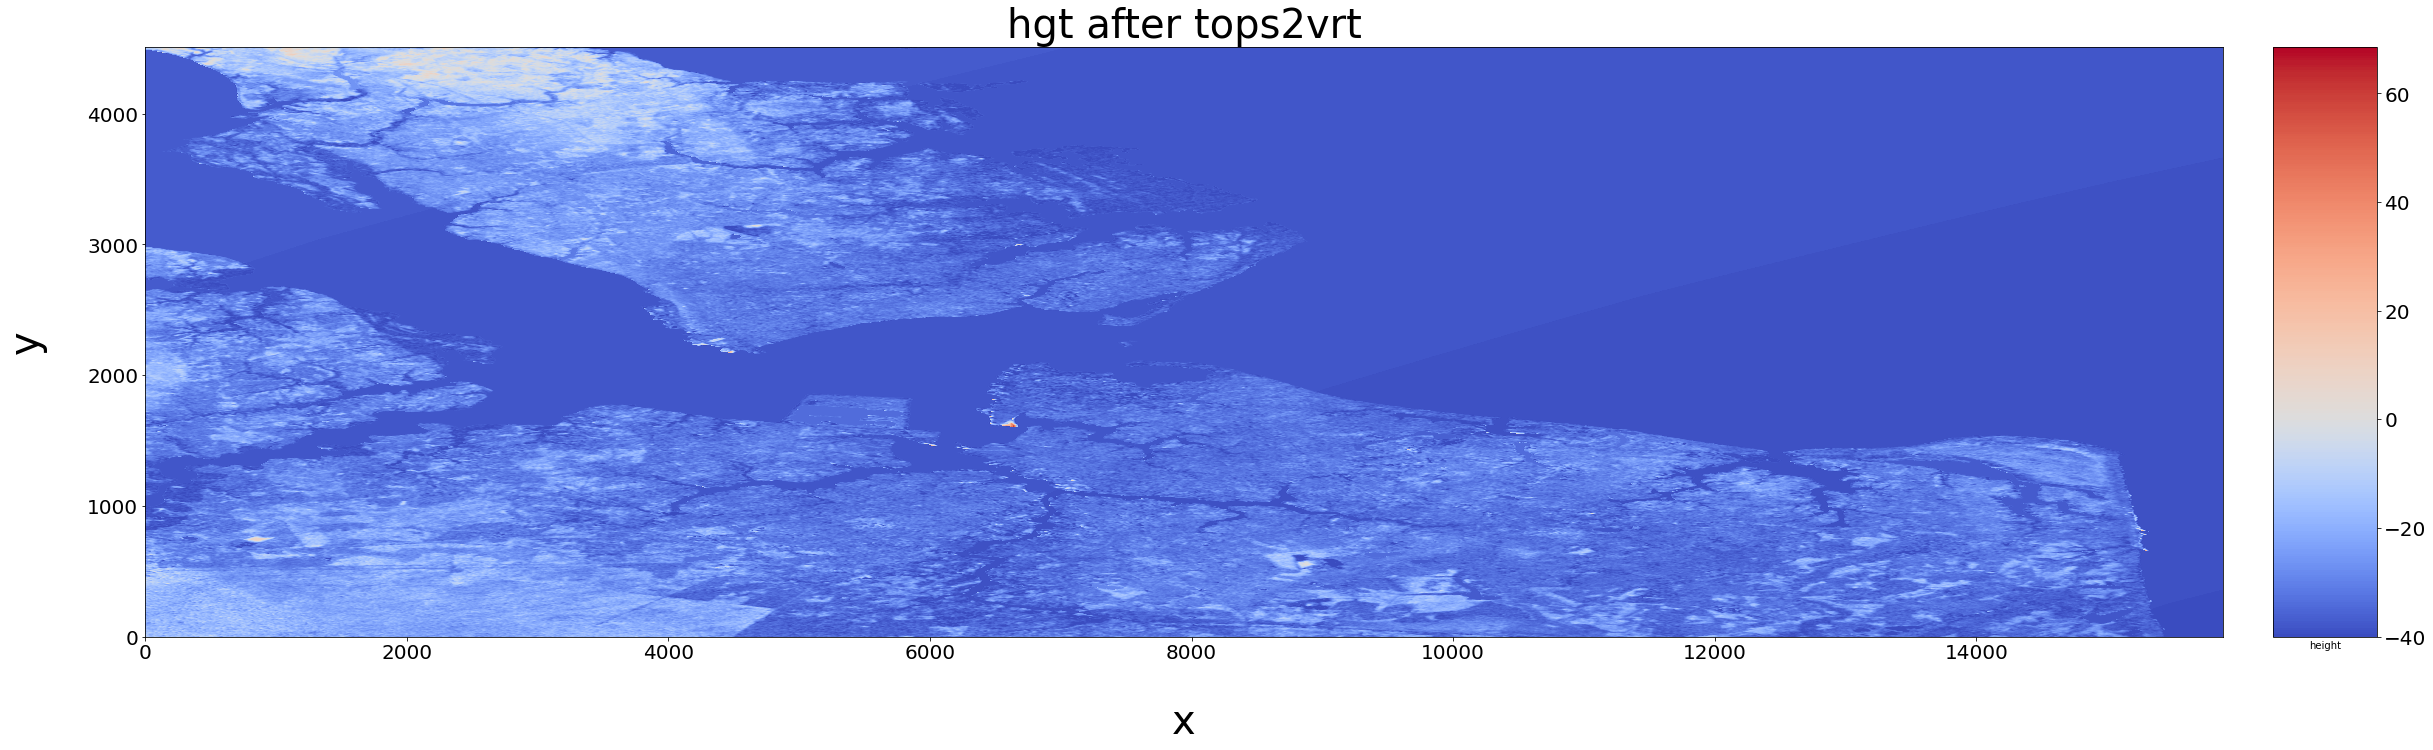

In [25]:
cmd = f'plotFringe.py {ExpHR.path_wd}/geometry/hgt.vrt --vmin -40'
# plotFringe.configure(cmd, (10, 10), 30);
f, a = plotFringe.configure(cmd, (40, 40), 40);
a.set_title('hgt after tops2vrt', fontsize=40);

Got 0 wrapped ifgs (SBAS-2)
Got 0 unwrapped ifgs
run view.py in MintPy version v1.3.3-36, date 2022-07-14
input file is geometry file: /u/leffe-data2/buzzanga/data/VLM/Sentinel1/HR_ARIA/MintPy_LOY2/inputs/geometryGeo.h5 in float32 format
file size in y/x: (571, 874)
input dataset: "['height']"
num of datasets in file geometryGeo.h5: 5
datasets to exclude (0):
[]
datasets to display (1):
['height']
data   coverage in y/x: (0, 0, 874, 571)
subset coverage in y/x: (0, 0, 874, 571)
data   coverage in lat/lon: (-76.65625, 37.22625, -75.927916958, 36.750416857000005)
subset coverage in lat/lon: (-76.65625, 37.22625, -75.927916958, 36.750416857000005)
------------------------------------------------------------------------
colormap: coolwarm
figure title: height
figure size : [10.00, 5.23]
reading data ...
data    range: [-82.0, 53.0] m
display range: [-40.0, 40.0] m
display data in transparency: 1.0
plot in geo-coordinate
plotting image ...
plot scale bar: [0.2, 0.2, 0.1]
showing ...


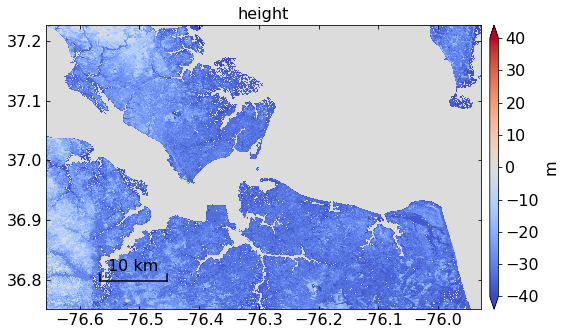

In [23]:
ExpHRa = ExpBase(HR_ARIA)

cmd = f'view.py {ExpHRa.path_wd}/MintPy_LOY2/inputs/geometryGeo.h5 height -c coolwarm -v -40 40'
obj = viewer(cmd)
obj.configure(); obj.plot()

# Radarcoding

## HR

In [23]:
path_geom_mp = op.join(ExpHR.path_wd, 'geometry', 'inputs','geometryRadar.h5')

### SWBD

run view.py in MintPy version v1.3.3-36, date 2022-07-14
input file is isce .wbd file: /u/leffe-data2/buzzanga/data/VLM/Sentinel1/HR/masks/swbdLat_N36_N38_Lon_W077_W075.wbd in uint8 format
file size in y/x: (7200, 7200)
num of datasets in file swbdLat_N36_N38_Lon_W077_W075.wbd: 1
datasets to exclude (0):
[]
datasets to display (1):
['band1']
data   coverage in y/x: (0, 0, 7200, 7200)
subset coverage in y/x: (0, 0, 7200, 7200)
data   coverage in lat/lon: (-77.00013888888888, 38.00013888888889, -75.00013888888888, 36.00013888888889)
subset coverage in lat/lon: (-77.00013888888888, 38.00013888888889, -75.00013888888888, 36.00013888888889)
------------------------------------------------------------------------
colormap: binary
figure title: swbdLat_N36_N38_Lon_W077_W075.wbd
figure size : [7.50, 6.00]
reading data ...
data has uniform and limited number (2 <= 20) of unique values --> discretize colormap
data    range: [0, 255] 1
display range: [-127.5, 382.5] 1
display data in transparency

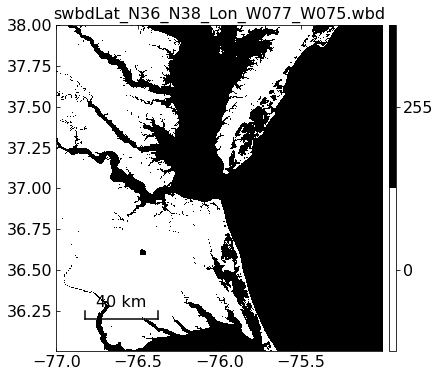

In [131]:
path_swbd_geo = op.join(ExpHR.path_masks, 'swbdLat_N36_N38_Lon_W077_W075.wbd')

## plot the raw SWBD mask
cmd = f'view.py {path_swbd_geo} -c binary' 
obj = viewer(cmd)
obj.configure(); obj.plot()

#### Run with prep_fringe geom -- works

geocode.py /u/leffe-data2/buzzanga/data/VLM/Sentinel1/HR2/masks/swbdLat_N36_N38_Lon_W077_W075.wbd -o /u/leffe-data2/buzzanga/data/VLM/Sentinel1/HR2/masks/swbd.h5 -l /u/leffe-data2/buzzanga/data/VLM/Sentinel1/HR2/geometry/inputs/geometryRadar.h5 --geo2radar
number of processor to be used: 1
resampling software: pyresample
read latitude / longitude from lookup table file: /u/leffe-data2/buzzanga/data/VLM/Sentinel1/HR2/geometry/inputs/geometryRadar.h5
input pixel size in (lat, lon) in degree: [-0.0002777777777777778, 0.0002777777777777778]
input area extent in (S, N, W, E) in degree: (36.00013888888889, 38.00013888888889, -77.00013888888888, -75.00013888888888)
--------------------------------------------------
resampling file: /u/leffe-data2/buzzanga/data/VLM/Sentinel1/HR2/masks/swbdLat_N36_N38_Lon_W077_W075.wbd
--------------------------------------------------
grab dataset structure from ref_file: /u/leffe-data2/buzzanga/data/VLM/Sentinel1/HR2/masks/swbdLat_N36_N38_Lon_W077_W075.wbd
cr

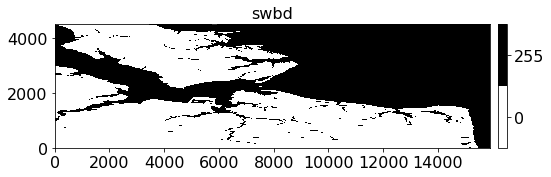

In [105]:
## use mintpy to radarcode watermask with full res geometry made by prep_fringe 
path_swbd_rdr  = op.join(ExpHR.path_masks, f'swbd.h5')

cmd  = f'geocode.py {path_swbd_geo} -o {path_swbd_rdr} -l {path_geom_mp} --geo2radar'
print (cmd)
!{cmd}

## plot the gecoded SWBD mask
# note that it loses the eastern shore (uses tops2vrt geom), but is otherwise correct
cmd = f'view.py {path_swbd_rdr} -c binary --flip-ud' 
obj = viewer(cmd)
obj.configure(); obj.plot()

#### run with isce geom
- correct for full ISCE geom extent
- cannot crop correctly though

In [49]:
## use mintpy to radarcode watermask with ISCE geometry 
# cropping fails
path_geom     = f'{ExpHR.path_wd}/merged/geom_reference'
path_swbd_rdr = op.join(ExpHR.path_masks, f'swbd.h5')

cmd  = f'geocode.py {path_swbd_geo} -o {path_swbd_rdr} --geo2rdr '#'-b {Exp.SNWEs} '
cmd += f'--lat-file {path_geom}/lat.rdr.full --lon-file {path_geom}/lon.rdr.full'
print (cmd)
!{cmd}

geocode.py /u/leffe-data2/buzzanga/data/VLM/Sentinel1/HR2/masks/swbdLat_N36_N38_Lon_W077_W075.wbd -o /u/leffe-data2/buzzanga/data/VLM/Sentinel1/HR2/masks/swbd.h5 --geo2rdr --lat-file /u/leffe-data2/buzzanga/data/VLM/Sentinel1/HR2/merged/geom_reference/lat.rdr.full --lon-file /u/leffe-data2/buzzanga/data/VLM/Sentinel1/HR2/merged/geom_reference/lon.rdr.full


run view.py in MintPy version v1.3.3-36, date 2022-07-14
input file is .wbd file: /u/leffe-data2/buzzanga/data/VLM/Sentinel1/HR2/masks/swbd.h5 in uint8 format
file size in y/x: (7753, 48581)
num of datasets in file swbd.h5: 1
datasets to exclude (0):
[]
datasets to display (1):
['band1']
data   coverage in y/x: (0, 0, 48581, 7753)
subset coverage in y/x: (0, 0, 48581, 7753)
data   coverage in lat/lon: None
subset coverage in lat/lon: None
------------------------------------------------------------------------
colormap: binary
figure title: swbd
figure size : [10.00, 1.28]
reading data ...
data has uniform and limited number (2 <= 20) of unique values --> discretize colormap
data    range: [0, 255] 1
display range: [-127.5, 382.5] 1
display data in transparency: 1.0
plotting in Y/X coordinate ...
plotting Data ...
flip figure up and down
showing ...


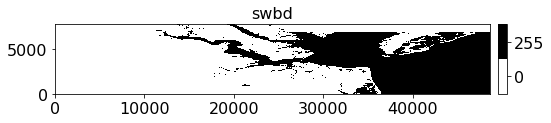

In [36]:
## plot the radarcoded SWBD mask
cmd = f'view.py {path_swbd_rdr} -c binary --flip-ud' 
obj = viewer(cmd)
obj.configure(); obj.plot()

In [81]:
## use mintpy to radarcode watermask with ISCE geometry try to crop
path_geom     = f'{ExpHR.path_wd}/merged/geom_reference'
path_swbd_rdr = op.join(ExpHR.path_masks, f'swbd.h5')

cmd  = f'geocode.py {path_swbd_geo} -o {path_swbd_rdr} --geo2rdr -b {ExpHR.SNWEs} '
cmd += f'--lat-file {path_geom}/lat.rdr.full --lon-file {path_geom}/lon.rdr.full'
print (cmd)
!{cmd}

geocode.py /u/leffe-data2/buzzanga/data/VLM/Sentinel1/HR2/masks/swbdLat_N36_N38_Lon_W077_W075.wbd -o /u/leffe-data2/buzzanga/data/VLM/Sentinel1/HR2/masks/swbd.h5 --geo2rdr -b 36.75 37.225 -76.655 -75.928 --lat-file /u/leffe-data2/buzzanga/data/VLM/Sentinel1/HR2/merged/geom_reference/lat.rdr.full --lon-file /u/leffe-data2/buzzanga/data/VLM/Sentinel1/HR2/merged/geom_reference/lon.rdr.full
No lookup table info range/lat found in files.
number of processor to be used: 1
resampling software: pyresample
read latitude / longitude from lookup table file: /u/leffe-data2/buzzanga/data/VLM/Sentinel1/HR2/merged/geom_reference/lat.rdr.full
input pixel size in (lat, lon) in degree: [-0.0002777777777777778, 0.0002777777777777778]
input area extent in (S, N, W, E) in degree: (36.749861111111116, 37.22486111111111, -76.65513888888889, -75.92791666666666)
--------------------------------------------------
resampling file: /u/leffe-data2/buzzanga/data/VLM/Sentinel1/HR2/masks/swbdLat_N36_N38_Lon_W077_W075

run view.py in MintPy version v1.3.3-36, date 2022-07-14
input file is .wbd file: /u/leffe-data2/buzzanga/data/VLM/Sentinel1/HR2/masks/swbd.h5 in uint8 format
file size in y/x: (7753, 48581)
num of datasets in file swbd.h5: 1
datasets to exclude (0):
[]
datasets to display (1):
['band1']
data   coverage in y/x: (0, 0, 48581, 7753)
subset coverage in y/x: (0, 0, 48581, 7753)
data   coverage in lat/lon: None
subset coverage in lat/lon: None
------------------------------------------------------------------------
colormap: binary
figure title: swbd
figure size : [10.00, 1.28]
reading data ...
data has uniform and limited number (2 <= 20) of unique values --> discretize colormap
data    range: [0, 255] 1
display range: [-127.5, 382.5] 1
display data in transparency: 1.0
plotting in Y/X coordinate ...
plotting Data ...
flip figure up and down
showing ...


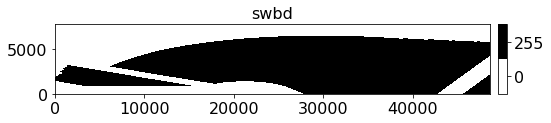

In [82]:
## plot the radarcoded SWBD mask
cmd = f'view.py {path_swbd_rdr} -c binary --flip-ud' 
obj = viewer(cmd)
obj.configure(); obj.plot()

#### crop and then radarcode with ISCE
- cant use the full res geom with cropped mask
- cant use the full res geom with a bbox and cropped mask

In [ ]:
# convert to envi so mintpy can read
path_swbd_geo_envi = op.join(ExpHR.path_masks, f'swbd_full.envi')
ds = gdal.Translate(path_swbd_geo_envi, f'{path_swbd_geo}.vrt', format='ENVI')
ds.FlushCache()
del ds

In [67]:
path_swbd_geo_bbox = op.join(ExpHR.path_masks, f'swbd_bbox.envi')

SN = ' '.join([str(coord) for coord in ExpHR.SNWE[:2]])
EW = ' '.join([str(coord) for coord in ExpHR.SNWE[2:]])
cmd = f'subset.py {path_swbd_geo_envi} -l {SN} -L {EW} -o {path_swbd_geo_bbox}'
print (cmd)
!{cmd}

subset.py /u/leffe-data2/buzzanga/data/VLM/Sentinel1/HR2/masks/swbd_full.envi -l 36.75 37.225 -L -76.655 -75.928 -o /u/leffe-data2/buzzanga/data/VLM/Sentinel1/HR2/masks/swbd_bbox.envi
------------------------------
subset .envi file: /u/leffe-data2/buzzanga/data/VLM/Sentinel1/HR2/masks/swbd_full.envi ...
data   range in (x0,y0,x1,y1): (0, 0, 7200, 7200)
subset range in (x0,y0,x1,y1): (1242, 2790, 3859, 4500)
data   range in (W, N, E, S): (-77.00013888888888, 38.00013888888889, -75.00013888888888, 36.00013888888889)
subset range in (W, N, E, S): (-76.65513888888889, 37.22513888888889, -75.92819444444443, 36.75013888888889)
writing >>> /u/leffe-data2/buzzanga/data/VLM/Sentinel1/HR2/masks/swbd_bbox.envi
update LENGTH, WIDTH, Y/XMAX
update/add SUBSET_XMIN/YMIN/XMAX/YMAX: 1242/2790/3859/4500
update Y/X_FIRST
reading band1 in (1242, 2790, 3859, 4500) from swbd_full.envi ...
write file: /u/leffe-data2/buzzanga/data/VLM/Sentinel1/HR2/masks/swbd_bbox.envi
write file: /u/leffe-data2/buzzanga/dat

run view.py in MintPy version v1.3.3-36, date 2022-07-14
input file is isce .envi file: /u/leffe-data2/buzzanga/data/VLM/Sentinel1/HR2/masks/swbd_bbox.envi in uint8 format
file size in y/x: (1710, 2617)
num of datasets in file swbd_bbox.envi: 1
datasets to exclude (0):
[]
datasets to display (1):
['band1']
data   coverage in y/x: (0, 0, 2617, 1710)
subset coverage in y/x: (0, 0, 2617, 1710)
data   coverage in lat/lon: (-76.65513888888889, 37.22513888888889, -75.92819444444443, 36.75013888888889)
subset coverage in lat/lon: (-76.65513888888889, 37.22513888888889, -75.92819444444443, 36.75013888888889)
------------------------------------------------------------------------
colormap: binary
figure title: swbd_bbox.envi
figure size : [10.00, 5.23]
reading data ...
data has uniform and limited number (2 <= 20) of unique values --> discretize colormap
data    range: [0, 255] 1
display range: [-127.5, 382.5] 1
display data in transparency: 1.0
plot in geo-coordinate
plotting image ...
plot s

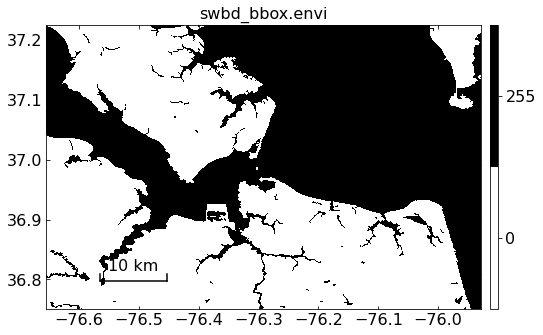

In [69]:
## plot the geocoded subset 
cmd = f'view.py {path_swbd_geo_bbox} -c binary' 
obj = viewer(cmd)
obj.configure(); obj.plot()

In [76]:
# output is wrong with no bbox specified (doesnt crop); cannot run with bbox
path_geom     = f'{ExpHR.path_wd}/merged/geom_reference'
path_swbd_rdr_bbox = op.join(ExpHR.path_masks, f'swbd_bbox.h5')

cmd  = f'geocode.py {path_swbd_geo_bbox} -o {path_swbd_rdr_bbox} --geo2rdr '#'-b {ExpHR.SNWEs} '
cmd += f'--lat-file {path_geom}/lat.rdr.full --lon-file {path_geom}/lon.rdr.full'
print (cmd)
!{cmd}

geocode.py /u/leffe-data2/buzzanga/data/VLM/Sentinel1/HR2/masks/swbd_bbox.envi -o /u/leffe-data2/buzzanga/data/VLM/Sentinel1/HR2/masks/swbd_bbox.h5 --geo2rdr --lat-file /u/leffe-data2/buzzanga/data/VLM/Sentinel1/HR2/merged/geom_reference/lat.rdr.full --lon-file /u/leffe-data2/buzzanga/data/VLM/Sentinel1/HR2/merged/geom_reference/lon.rdr.full
No lookup table info range/lat found in files.
number of processor to be used: 1
resampling software: pyresample
read latitude / longitude from lookup table file: /u/leffe-data2/buzzanga/data/VLM/Sentinel1/HR2/merged/geom_reference/lat.rdr.full
input pixel size in (lat, lon) in degree: [-0.000277777777777778, 0.000277777777777778]
input area extent in (S, N, W, E) in degree: (36.75013888888889, 37.22513888888889, -76.65513888888889, -75.92819444444444)
--------------------------------------------------
resampling file: /u/leffe-data2/buzzanga/data/VLM/Sentinel1/HR2/masks/swbd_bbox.envi
--------------------------------------------------
grab dataset

run view.py in MintPy version v1.3.3-36, date 2022-07-14
input file is .envi file: /u/leffe-data2/buzzanga/data/VLM/Sentinel1/HR2/masks/swbd_bbox.h5 in uint8 format
file size in y/x: (7753, 48581)
num of datasets in file swbd_bbox.h5: 1
datasets to exclude (0):
[]
datasets to display (1):
['band1']
data   coverage in y/x: (0, 0, 48581, 7753)
subset coverage in y/x: (0, 0, 48581, 7753)
data   coverage in lat/lon: None
subset coverage in lat/lon: None
------------------------------------------------------------------------
colormap: binary
figure title: swbd_bbox
figure size : [10.00, 1.28]
reading data ...
data has uniform and limited number (2 <= 20) of unique values --> discretize colormap
data    range: [0, 255] 1
display range: [-127.5, 382.5] 1
display data in transparency: 1.0
plotting in Y/X coordinate ...
plotting Data ...
showing ...


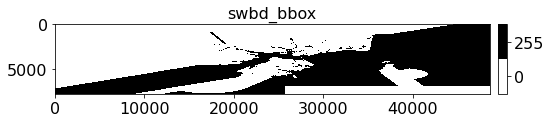

In [77]:
## plot the radarcoded subset 
cmd = f'view.py {path_swbd_rdr_bbox} -c binary' 
obj = viewer(cmd)
obj.configure(); obj.plot()

#### run with template file -- works

In [156]:
ExpHR = ExpBase(HR_2016)
os.chdir(ExpHR.path_wd)

Got 0 wrapped ifgs (SR)
Got 0 unwrapped ifgs


In [208]:
### NOTE: You can only subset once the waterMask is made at full resolution; otherwise it double crops it
template = """
mintpy.load.processor        = isce
mintpy.load.updateMode       = no
mintpy.load.metaFile         = ./reference/IW*.xml
mintpy.load.baselineDir      = ./baselines


mintpy.load.demFile          = ./merged/geom_reference/hgt.rdr.full
mintpy.load.lookupYFile      = ./merged/geom_reference/lat.rdr.full
mintpy.load.lookupXFile      = ./merged/geom_reference/lon.rdr.full
mintpy.load.incAngleFile     = ./merged/geom_reference/los.rdr.full
mintpy.load.azAngleFile      = ./merged/geom_reference/los.rdr.full
mintpy.load.shadowMaskFile   = ./merged/geom_reference/shadowMask.rdr.full
mintpy.load.shadowMaskFile   = ./merged/geom_reference/shadowMask.rdr.full


# dummies
mintpy.load.unwFile    = ../../merged/interferograms/*/filt_*.unw
mintpy.load.ionUnwFile = ../../merged/interferograms/*/filt_ion*.unw
mintpy.load.rgOffFile  = ../../merged/interferograms/*/filt_ion*.unw
mintpy.load.azOffFile  = ../../merged/interferograms/*/filt_ion*.unw

"""

path_cfg = op.join(ExpHR.path_wd, f'temp.cfg')    
with open(path_cfg, 'w') as fh:
    print (template, file=fh)

cmd = f'load_data.py -t {path_cfg} --geom'
!{cmd}

processor : isce
SAR platform/sensor : Sen
--------------------------------------------------
prepare metadata files for isce products
prep_isce.py -m ./reference/IW2.xml -g ./merged/geom_reference -b ./baselines --geom-files hgt.rdr.full lat.rdr.full lon.rdr.full los.rdr.full los.rdr.full shadowMask.rdr.full
['./reference/data.rsc'] exists and is newer than ['./reference/IW2.xml'] --> skip.
preparing RSC file for geometry files
read perp baseline time-series from ./baselines
preparing RSC file for: .
/u/leffe-data2/buzzanga/Software_InSAR/MintPy_git/mintpy/load_data.py:782: UserWarning: prep_isce.py failed. Assuming its result exists and continue...
  warnings.warn('prep_isce.py failed. Assuming its result exists and continue...')
--------------------------------------------------
updateMode : False
compression: None
multilook x/ystep: 1/1
multilook method : nearest
--------------------------------------------------
searching geometry files info
input data files:
height          : ./m

In [209]:
path_swbd_geo = op.join(ExpHR.path_masks, 'swbdLat_N36_N38_Lon_W077_W075.wbd')
path_geom_new = f'{ExpHR.path_wd}/inputs/geometryRadar.h5'

cmd  = f'geocode.py {path_swbd_geo} -l {path_geom_new} -o {ExpHR.path_masks}/waterBody.h5 --geo2radar '
cmd += f'--ram 32 --nprocs 8'
!{cmd}

cmd = f'generate_mask.py  {ExpHR.path_masks}/waterBody.h5 -m 50 -o  {ExpHR.path_masks}/waterMask_tst.h5'
!{cmd}


number of processor to be used: 8
resampling software: pyresample
read latitude / longitude from lookup table file: /u/leffe-data2/buzzanga/data/VLM/Sentinel1/HR_2016/inputs/geometryRadar.h5
input pixel size in (lat, lon) in degree: [-0.0002777777777777778, 0.0002777777777777778]
input area extent in (S, N, W, E) in degree: (36.00013888888889, 38.00013888888889, -77.00013888888888, -75.00013888888888)
--------------------------------------------------
resampling file: /u/leffe-data2/buzzanga/data/VLM/Sentinel1/HR_2016/masks/swbdLat_N36_N38_Lon_W077_W075.wbd
--------------------------------------------------
grab dataset structure from ref_file: /u/leffe-data2/buzzanga/data/VLM/Sentinel1/HR_2016/masks/swbdLat_N36_N38_Lon_W077_W075.wbd
create HDF5 file: /u/leffe-data2/buzzanga/data/VLM/Sentinel1/HR_2016/masks/waterBody.h5 with w mode
create dataset  : band1 of uint8                     in size of (7751, 47979)        with compression = None
close  HDF5 file: /u/leffe-data2/buzzanga/data/

run view.py in MintPy version v1.3.3-36, date 2022-07-14
input file is mask file: /u/leffe-data2/buzzanga/data/VLM/Sentinel1/HR_2016/masks/waterMask_tst.h5 in bool format
file size in y/x: (7751, 47979)
num of datasets in file waterMask_tst.h5: 1
datasets to exclude (0):
[]
datasets to display (1):
['mask']
data   coverage in y/x: (0, 0, 47979, 7751)
subset coverage in y/x: (0, 0, 47979, 7751)
data   coverage in lat/lon: None
subset coverage in lat/lon: None
------------------------------------------------------------------------
colormap: binary
figure title: waterMask_tst
figure size : [10.00, 1.29]
reading data ...
data has uniform and limited number (2 <= 20) of unique values --> discretize colormap
data    range: [False, True] 1
display range: [-0.5, 1.5] 1
display data in transparency: 1.0
plotting in Y/X coordinate ...
plotting Data ...
flip figure up and down
showing ...


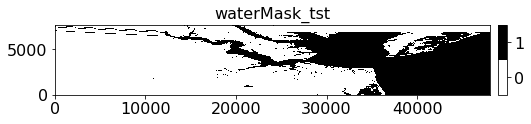

In [210]:
## plot the full radarcoded  mask
cmd = f'view.py {ExpHR.path_masks}/waterMask_tst.h5 -c binary --flip-ud' 
obj = viewer(cmd)
obj.configure(); obj.plot()

In [211]:
template = f"""{template}
mintpy.load.waterMaskFile    = ./masks/waterMask_tst.h5
mintpy.subset.lalo           = 36.75:37.225,-76.655:-75.928
"""

path_cfg = op.join(ExpHR.path_wd, f'temp.cfg')    
with open(path_cfg, 'w') as fh:
    print (template, file=fh)

cmd = f'load_data.py -t {path_cfg} --geom'
!{cmd}

processor : isce
SAR platform/sensor : Sen
--------------------------------------------------
prepare metadata files for isce products
prep_isce.py -m ./reference/IW2.xml -g ./merged/geom_reference -b ./baselines --geom-files hgt.rdr.full lat.rdr.full lon.rdr.full los.rdr.full los.rdr.full shadowMask.rdr.full waterMask_tst.h5
['./reference/data.rsc'] exists and is newer than ['./reference/IW2.xml'] --> skip.
preparing RSC file for geometry files
read perp baseline time-series from ./baselines
preparing RSC file for: .
/u/leffe-data2/buzzanga/Software_InSAR/MintPy_git/mintpy/load_data.py:782: UserWarning: prep_isce.py failed. Assuming its result exists and continue...
  warnings.warn('prep_isce.py failed. Assuming its result exists and continue...')
--------------------------------------------------
updateMode : False
compression: None
multilook x/ystep: 1/1
multilook method : nearest
input bounding box of interest in lalo: (-76.655, 37.225, -75.928, 36.75)
box to read for datasets in y

run view.py in MintPy version v1.3.3-36, date 2022-07-14
input file is geometry file: /u/leffe-data2/buzzanga/data/VLM/Sentinel1/HR_2016/inputs/geometryRadar.h5 in float32 format
file size in y/x: (4552, 21063)
input dataset: "['waterMask']"
num of datasets in file geometryRadar.h5: 8
datasets to exclude (0):
[]
datasets to display (1):
['waterMask']
data   coverage in y/x: (0, 0, 21063, 4552)
subset coverage in y/x: (0, 0, 21063, 4552)
data   coverage in lat/lon: None
subset coverage in lat/lon: None
------------------------------------------------------------------------
colormap: binary
figure title: waterMask
figure size : [10.00, 1.73]
reading data ...
data has uniform and limited number (2 <= 20) of unique values --> discretize colormap
data    range: [False, True] 1
display range: [-0.5, 1.5] 1
display data in transparency: 1.0
plotting in Y/X coordinate ...
plotting Data ...
flip figure up and down
showing ...


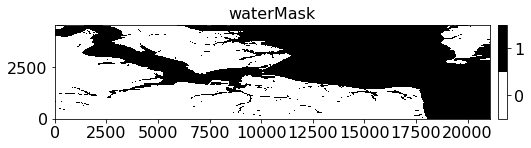

In [212]:
## plot the radarcoded subset in the geom file
cmd = f'view.py {ExpHR.path_wd}/inputs/geometryRadar.h5 waterMask -c binary --flip-ud' 
obj = viewer(cmd)
obj.configure(); obj.plot()

### OSM

In [ ]:
# if you use the nonreadable (by mintpy, OSM_wmask.msk) GTiff, then the file is messed up
# use the .wbd envi file and you're all good

view.py /u/leffe-data2/buzzanga/data/Crops/HR/OSM_wmask.msk -c binary --noverbose


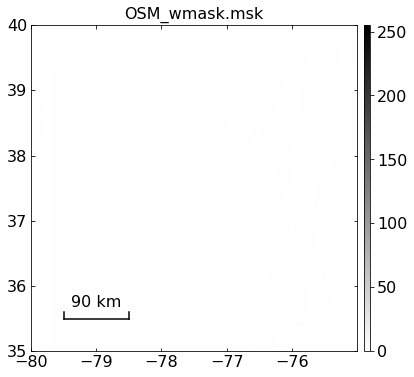

In [21]:
# show these to yunjun, and maybe the failed crop with the isce geom
path_osm_geo = op.join(ExpHR.path_crops, f'OSM_wmask.msk') # geotiff

cmd = f'view.py {path_osm_geo} -c binary --noverbose' 
obj = viewer(cmd)
obj.configure(); obj.plot()

path_osm_geo1 = op.join(ExpHR.path_crops, f'OSM_wmask.wbd') # envi file, gdal_translate of OSM_wmask.msk

cmd = f'view.py {path_osm_geo1} -c binary --noverbose' 
obj = viewer(cmd)
obj.configure(); obj.plot()



#### Run with prep_fringe geom -- works

geocode.py /u/leffe-data2/buzzanga/data/Crops/HR/OSM_wmask.msk -o /u/leffe-data2/buzzanga/data/VLM/Sentinel1/HR_2016/masks/OSM.h5 -l /u/leffe-data2/buzzanga/data/VLM/Sentinel1/HR_2016/geometry/inputs/geometryRadar.h5 --geo2radar
number of processor to be used: 1
resampling software: pyresample
read latitude / longitude from lookup table file: /u/leffe-data2/buzzanga/data/VLM/Sentinel1/HR_2016/geometry/inputs/geometryRadar.h5
input pixel size in (lat, lon) in degree: [-0.000833333333333333, 0.000833333333333333]
input area extent in (S, N, W, E) in degree: (34.999999999999964, 39.999999999999964, -80.00083333333336, -75.00083333333336)
--------------------------------------------------
resampling file: /u/leffe-data2/buzzanga/data/Crops/HR/OSM_wmask.msk
--------------------------------------------------
grab dataset structure from ref_file: /u/leffe-data2/buzzanga/data/Crops/HR/OSM_wmask.msk
create HDF5 file: /u/leffe-data2/buzzanga/data/VLM/Sentinel1/HR_2016/masks/OSM.h5 with w mode
cr

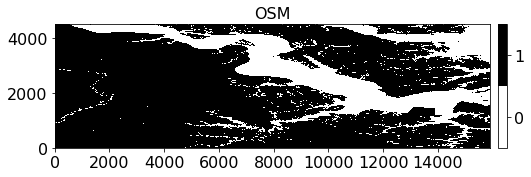

In [24]:
## use mintpy to radarcode watermask with full res geometry made by prep_fringe 
path_osm_rdr  = op.join(ExpHR.path_masks, f'OSM.h5')

cmd  = f'geocode.py {path_osm_geo} -o {path_osm_rdr} -l {path_geom_mp} --geo2radar'
print (cmd)
!{cmd}

cmd = f'view.py {path_osm_rdr} -c binary --flip-ud' 
obj = viewer(cmd)
obj.configure(); obj.plot()

#### Radarcode with with ISCE  

In [ ]:
# cropping fails
path_geom     = f'{ExpHR.path_wd}/merged/geom_reference'
path_osm_rdr  = op.join(ExpHR.path_masks, f'OSM.h5')


cmd  = f'geocode.py {path_osm_geo} -o {path_osm_rdr} --geo2rdr '#'-b {Exp.SNWEs} '
cmd += f'--lat-file {path_geom}/lat.rdr.full --lon-file {path_geom}/lon.rdr.full '
cmd += f'--ram 32 --nprocs 8'

print (cmd)
!{cmd}

geocode.py /u/leffe-data2/buzzanga/data/Crops/HR/OSM_wmask.msk -o /u/leffe-data2/buzzanga/data/VLM/Sentinel1/HR_2016/masks/OSM.h5 --geo2rdr --lat-file /u/leffe-data2/buzzanga/data/VLM/Sentinel1/HR_2016/merged/geom_reference/lat.rdr.full --lon-file /u/leffe-data2/buzzanga/data/VLM/Sentinel1/HR_2016/merged/geom_reference/lon.rdr.full --ram 32 --nprocs 8
number of processor to be used: 8
resampling software: pyresample
read latitude / longitude from lookup table file: inputs/geometryRadar.h5
input pixel size in (lat, lon) in degree: [-0.000833333333333333, 0.000833333333333333]
input area extent in (S, N, W, E) in degree: (34.999999999999964, 39.999999999999964, -80.00083333333336, -75.00083333333336)
--------------------------------------------------
resampling file: /u/leffe-data2/buzzanga/data/Crops/HR/OSM_wmask.msk
--------------------------------------------------
grab dataset structure from ref_file: /u/leffe-data2/buzzanga/data/Crops/HR/OSM_wmask.msk
create HDF5 file: /u/leffe-data

run view.py in MintPy version v1.3.3-36, date 2022-07-14
input file is .wbd file: /u/leffe-data2/buzzanga/data/VLM/Sentinel1/HR2/masks/OSM.h5 in uint8 format
file size in y/x: (7753, 48581)
num of datasets in file OSM.h5: 1
datasets to exclude (0):
[]
datasets to display (1):
['band1']
data   coverage in y/x: (0, 0, 48581, 7753)
subset coverage in y/x: (0, 0, 48581, 7753)
data   coverage in lat/lon: None
subset coverage in lat/lon: None
------------------------------------------------------------------------
colormap: binary
figure title: OSM
figure size : [10.00, 1.28]
reading data ...
masking pixels with NO_DATA_VALUE of 2.0
data has uniform and limited number (2 <= 20) of unique values --> discretize colormap
data    range: [0, 1] 1
display range: [-0.5, 1.5] 1
display data in transparency: 1.0
plotting in Y/X coordinate ...
plotting Data ...
flip figure up and down
showing ...


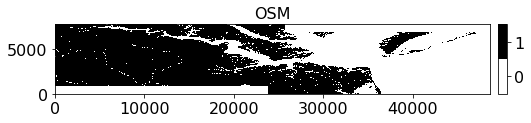

In [104]:
## plot the radarcoded OSM mask
cmd = f'view.py {path_osm_rdr} -c binary --flip-ud' 
obj = viewer(cmd)
obj.configure(); obj.plot()

#### Run with template file - also works

In [5]:
ExpHR = ExpBase(HR_2016)
os.chdir(ExpHR.path_wd)

Got 0 wrapped ifgs (SR)
Got 0 unwrapped ifgs


In [8]:
### NOTE: You can only subset once the waterMask is made at full resolution; otherwise it double crops it
template = """
mintpy.load.processor        = isce
mintpy.load.updateMode       = no
mintpy.load.metaFile         = ./reference/IW*.xml
mintpy.load.baselineDir      = ./baselines


mintpy.load.demFile          = ./merged/geom_reference/hgt.rdr.full
mintpy.load.lookupYFile      = ./merged/geom_reference/lat.rdr.full
mintpy.load.lookupXFile      = ./merged/geom_reference/lon.rdr.full
mintpy.load.incAngleFile     = ./merged/geom_reference/los.rdr.full
mintpy.load.azAngleFile      = ./merged/geom_reference/los.rdr.full
mintpy.load.shadowMaskFile   = ./merged/geom_reference/shadowMask.rdr.full
mintpy.load.shadowMaskFile   = ./merged/geom_reference/shadowMask.rdr.full


# dummies
mintpy.load.unwFile    = ../../merged/interferograms/*/filt_*.unw
mintpy.load.ionUnwFile = ../../merged/interferograms/*/filt_ion*.unw
mintpy.load.rgOffFile  = ../../merged/interferograms/*/filt_ion*.unw
mintpy.load.azOffFile  = ../../merged/interferograms/*/filt_ion*.unw

"""

path_cfg = op.join(ExpHR.path_wd, f'temp.cfg')    
with open(path_cfg, 'w') as fh:
    print (template, file=fh)

cmd = f'load_data.py -t {path_cfg} --geom'
!{cmd}

processor : isce
SAR platform/sensor : Sen
--------------------------------------------------
prepare metadata files for isce products
prep_isce.py -m ./reference/IW2.xml -g ./merged/geom_reference -b ./baselines --geom-files hgt.rdr.full lat.rdr.full lon.rdr.full los.rdr.full los.rdr.full shadowMask.rdr.full
['./reference/data.rsc'] exists and is newer than ['./reference/IW2.xml'] --> skip.
preparing RSC file for geometry files
read perp baseline time-series from ./baselines
preparing RSC file for: .
/u/leffe-data2/buzzanga/Software_InSAR/MintPy_git/mintpy/load_data.py:782: UserWarning: prep_isce.py failed. Assuming its result exists and continue...
  warnings.warn('prep_isce.py failed. Assuming its result exists and continue...')
--------------------------------------------------
updateMode : False
compression: None
multilook x/ystep: 1/1
multilook method : nearest
--------------------------------------------------
searching geometry files info
input data files:
height          : ./m

In [12]:
path_osm_geo = op.join(ExpHR.path_crops, f'OSM_wmask.wbd')
path_geom_new = f'{ExpHR.path_wd}/inputs/geometryRadar.h5'

cmd  = f'geocode.py {path_osm_geo} -l {path_geom_new} -o {ExpHR.path_masks}/waterBody.h5 --geo2radar '
cmd += f'--ram 32 --nprocs 8'
!{cmd}

cmd = f'generate_mask.py  {ExpHR.path_masks}/waterBody.h5 -m 1 -o  {ExpHR.path_masks}/waterMask_tst.h5'
!{cmd}

number of processor to be used: 8
resampling software: pyresample
read latitude / longitude from lookup table file: /u/leffe-data2/buzzanga/data/VLM/Sentinel1/HR_2016/inputs/geometryRadar.h5
input pixel size in (lat, lon) in degree: [-0.000833333333333333, 0.000833333333333333]
input area extent in (S, N, W, E) in degree: (34.999999999999964, 39.999999999999964, -80.00083333333336, -75.00083333333336)
--------------------------------------------------
resampling file: /u/leffe-data2/buzzanga/data/Crops/HR/OSM_wmask.wbd
--------------------------------------------------
grab dataset structure from ref_file: /u/leffe-data2/buzzanga/data/Crops/HR/OSM_wmask.wbd
create HDF5 file: /u/leffe-data2/buzzanga/data/VLM/Sentinel1/HR_2016/masks/waterBody.h5 with w mode
create dataset  : band1 of uint8                     in size of (7751, 47979)        with compression = None
close  HDF5 file: /u/leffe-data2/buzzanga/data/VLM/Sentinel1/HR_2016/masks/waterBody.h5
-------------------------------------

run view.py in MintPy version v1.3.3-36, date 2022-07-14
input file is mask file: /u/leffe-data2/buzzanga/data/VLM/Sentinel1/HR_2016/masks/waterMask_tst.h5 in bool format
file size in y/x: (7751, 47979)
num of datasets in file waterMask_tst.h5: 1
datasets to exclude (0):
[]
datasets to display (1):
['mask']
data   coverage in y/x: (0, 0, 47979, 7751)
subset coverage in y/x: (0, 0, 47979, 7751)
data   coverage in lat/lon: None
subset coverage in lat/lon: None
------------------------------------------------------------------------
colormap: binary
figure title: waterMask_tst
figure size : [10.00, 1.29]
reading data ...
masking pixels with NO_DATA_VALUE of 2.0
data has uniform and limited number (2 <= 20) of unique values --> discretize colormap
data    range: [False, True] 1
display range: [-0.5, 1.5] 1
display data in transparency: 1.0
plotting in Y/X coordinate ...
plotting Data ...
flip figure up and down
showing ...


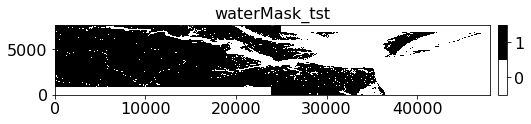

In [15]:
## plot the full radarcoded  mask
cmd = f'view.py {ExpHR.path_masks}/waterMask_tst.h5 -c binary --flip-ud' 
obj = viewer(cmd)
obj.configure(); obj.plot()

In [16]:
template = f"""{template}
mintpy.load.waterMaskFile    = ./masks/waterMask_tst.h5
mintpy.subset.lalo           = 36.75:37.225,-76.655:-75.928
"""

path_cfg = op.join(ExpHR.path_wd, f'temp.cfg')    
with open(path_cfg, 'w') as fh:
    print (template, file=fh)

cmd = f'load_data.py -t {path_cfg} --geom'
!{cmd}

processor : isce
SAR platform/sensor : Sen
--------------------------------------------------
prepare metadata files for isce products
prep_isce.py -m ./reference/IW2.xml -g ./merged/geom_reference -b ./baselines --geom-files hgt.rdr.full lat.rdr.full lon.rdr.full los.rdr.full los.rdr.full shadowMask.rdr.full waterMask_tst.h5
['./reference/data.rsc'] exists and is newer than ['./reference/IW2.xml'] --> skip.
preparing RSC file for geometry files
read perp baseline time-series from ./baselines
preparing RSC file for: .
/u/leffe-data2/buzzanga/Software_InSAR/MintPy_git/mintpy/load_data.py:782: UserWarning: prep_isce.py failed. Assuming its result exists and continue...
  warnings.warn('prep_isce.py failed. Assuming its result exists and continue...')
--------------------------------------------------
updateMode : False
compression: None
multilook x/ystep: 1/1
multilook method : nearest
input bounding box of interest in lalo: (-76.655, 37.225, -75.928, 36.75)
box to read for datasets in y

run view.py in MintPy version v1.3.3-36, date 2022-07-14
input file is geometry file: /u/leffe-data2/buzzanga/data/VLM/Sentinel1/HR_2016/inputs/geometryRadar.h5 in float32 format
file size in y/x: (4552, 21063)
input dataset: "['waterMask']"
num of datasets in file geometryRadar.h5: 8
datasets to exclude (0):
[]
datasets to display (1):
['waterMask']
data   coverage in y/x: (0, 0, 21063, 4552)
subset coverage in y/x: (0, 0, 21063, 4552)
data   coverage in lat/lon: None
subset coverage in lat/lon: None
------------------------------------------------------------------------
colormap: binary
figure title: waterMask
figure size : [10.00, 1.73]
reading data ...
data has uniform and limited number (2 <= 20) of unique values --> discretize colormap
data    range: [False, True] 1
display range: [-0.5, 1.5] 1
display data in transparency: 1.0
plotting in Y/X coordinate ...
plotting Data ...
flip figure up and down
showing ...


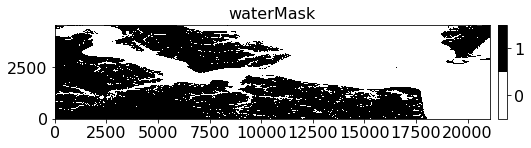

In [17]:
## plot the radarcoded subset in the geom file
cmd = f'view.py {ExpHR.path_wd}/inputs/geometryRadar.h5 waterMask -c binary --flip-ud' 
obj = viewer(cmd)
obj.configure(); obj.plot()

## NYC

In [107]:
path_geom_mp = op.join(ExpNYC.path_wd, 'geometry', 'inputs','geometryRadar.h5')

### SWBD

run view.py in MintPy version v1.3.3-36, date 2022-07-14
input file is isce .wbd file: /u/leffe-data2/buzzanga/data/VLM/Sentinel1/NYC/masks/swbdLat_N40_N42_Lon_W075_W072.wbd in uint8 format
file size in y/x: (7200, 10800)
num of datasets in file swbdLat_N40_N42_Lon_W075_W072.wbd: 1
datasets to exclude (0):
[]
datasets to display (1):
['band1']
data   coverage in y/x: (0, 0, 10800, 7200)
subset coverage in y/x: (0, 0, 10800, 7200)
data   coverage in lat/lon: (-75.00013888888888, 42.00013888888889, -72.00013888888888, 40.00013888888889)
subset coverage in lat/lon: (-75.00013888888888, 42.00013888888889, -72.00013888888888, 40.00013888888889)
------------------------------------------------------------------------
colormap: binary
figure title: swbdLat_N40_N42_Lon_W075_W072.wbd
figure size : [10.00, 5.33]
reading data ...
data    range: [255, 255] 1
display range: [255.0, 255.0] 1
display data in transparency: 1.0
plot in geo-coordinate
plotting image ...
plot scale bar: [0.2, 0.2, 0.1]
s

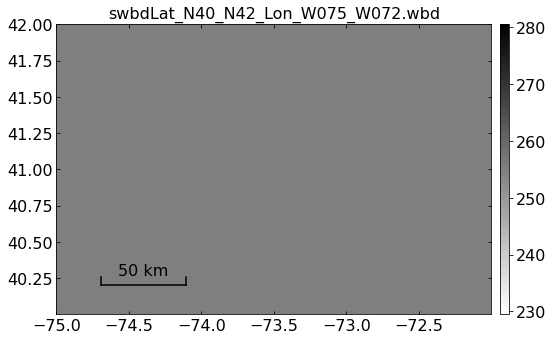

In [108]:
path_swbd_geo = op.join(ExpNYC.path_masks, 'swbdLat_N40_N42_Lon_W075_W072.wbd')

## plot the raw SWBD mask
cmd = f'view.py {path_swbd_geo} -c binary' 
obj = viewer(cmd)
obj.configure(); obj.plot()

In [ ]:
## use mintpy to radarcode watermask with full res geometry made by prep_fringe 
path_swbd_rdr  = op.join(ExpNYC.path_masks, f'{base}.h5')

cmd  = f'geocode.py {path_swbd_geo} -o {path_swbd_rdr} -l {path_geom_mp} --geo2radar'
print (cmd)
!{cmd}

## plot the gecoded SWBD mask
cmd = f'view.py {path_swbd_rdr} -c binary --flip-ud' 
obj = viewer(cmd)
obj.configure(); obj.plot()

In [ ]:
## use mintpy to radarcode watermask with ISCE geometry 
# cropping fails
path_geom     = f'{ExpNYC.path_wd}/merged/geom_reference'
path_swbd_rdr = op.join(Exp.path_masks, f'{base}.h5')

cmd  = f'geocode.py {path_swbd_geo} -o {path_swbd_rdr} --geo2rdr '#'-b {Exp.SNWEs} '
cmd += f'--lat-file {path_geom}/lat.rdr.full --lon-file {path_geom}/lon.rdr.full'
print (cmd)
!{cmd}

In [ ]:
## crop after the fact?
# subset.py {path_swbd_rdr} 

In [ ]:
## plot the gecoded SWBD mask
cmd = f'view.py {path_swbd_rdr} -c binary --flip-ud' 
obj = viewer(cmd)
obj.configure(); obj.plot()

### OSM

run view.py in MintPy version v1.3.3-36, date 2022-07-14
input file is isce .wbd file: /u/leffe-data2/buzzanga/data/Crops/NYC/OSM_wmask.wbd in uint8 format
file size in y/x: (6000, 6000)
num of datasets in file OSM_wmask.wbd: 1
datasets to exclude (0):
[]
datasets to display (1):
['band1']
data   coverage in y/x: (0, 0, 6000, 6000)
subset coverage in y/x: (0, 0, 6000, 6000)
data   coverage in lat/lon: (-75.00083333333336, 44.999999999999964, -70.00083333333336, 39.999999999999964)
subset coverage in lat/lon: (-75.00083333333336, 44.999999999999964, -70.00083333333336, 39.999999999999964)
------------------------------------------------------------------------
colormap: binary
figure title: OSM_wmask.wbd
figure size : [7.50, 6.00]
reading data ...
masking pixels with NO_DATA_VALUE of 2.0
data has uniform and limited number (2 <= 20) of unique values --> discretize colormap
data    range: [0, 1] 1
display range: [-0.5, 1.5] 1
display data in transparency: 1.0
plot in geo-coordinate
plott

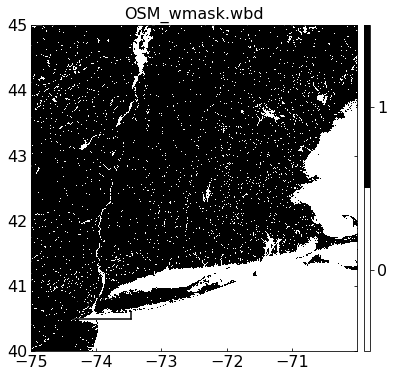

In [112]:
path_osm_geo = op.join(ExpNYC.path_crops, f'OSM_wmask.wbd')

cmd = f'view.py {path_osm_geo} -c binary' 
obj = viewer(cmd)
obj.configure(); obj.plot()

geocode.py /u/leffe-data2/buzzanga/data/Crops/NYC/OSM_wmask.wbd -o /u/leffe-data2/buzzanga/data/VLM/Sentinel1/HR2/masks/OSM.h5 -l /u/leffe-data2/buzzanga/data/VLM/Sentinel1/NYC/geometry/inputs/geometryRadar.h5 --geo2radar
number of processor to be used: 1
resampling software: pyresample
read latitude / longitude from lookup table file: /u/leffe-data2/buzzanga/data/VLM/Sentinel1/NYC/geometry/inputs/geometryRadar.h5
input pixel size in (lat, lon) in degree: [-0.000833333333333333, 0.000833333333333333]
input area extent in (S, N, W, E) in degree: (39.999999999999964, 44.999999999999964, -75.00083333333336, -70.00083333333336)
--------------------------------------------------
resampling file: /u/leffe-data2/buzzanga/data/Crops/NYC/OSM_wmask.wbd
--------------------------------------------------
grab dataset structure from ref_file: /u/leffe-data2/buzzanga/data/Crops/NYC/OSM_wmask.wbd
create HDF5 file: /u/leffe-data2/buzzanga/data/VLM/Sentinel1/HR2/masks/OSM.h5 with w mode
create dataset 

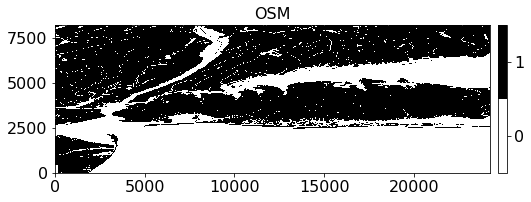

In [117]:
## use mintpy to radarcode watermask with full res geometry made by prep_fringe 
path_osm_rdr  = op.join(ExpHR.path_masks, f'OSM.h5')

cmd  = f'geocode.py {path_osm_geo} -o {path_osm_rdr} -l {path_geom_mp} --geo2radar'
print (cmd)
!{cmd}

cmd = f'view.py {path_osm_rdr} -c binary --flip-ud' 
obj = viewer(cmd)
obj.configure(); obj.plot()

In [125]:
## use mintpy to radarcode watermask with ISCE geometry 
# cropping fails
path_geom     = f'{ExpHR.path_wd}/merged/geom_reference'
path_osm_rdr  = op.join(ExpHR.path_masks, f'OSM.h5')

cmd  = f'geocode.py {path_osm_geo} -o {path_osm_rdr} --geo2rdr -b {ExpHR.SNWEs} '
cmd += f'--lat-file {path_geom}/lat.rdr.full --lon-file {path_geom}/lon.rdr.full '
print (cmd)
!{cmd}

geocode.py /u/leffe-data2/buzzanga/data/Crops/NYC/OSM_wmask.wbd -o /u/leffe-data2/buzzanga/data/VLM/Sentinel1/HR2/masks/OSM.h5 --geo2rdr -b 36.75 37.225 -76.655 -75.928 --lat-file /u/leffe-data2/buzzanga/data/VLM/Sentinel1/HR2/merged/geom_reference/lat.rdr.full --lon-file /u/leffe-data2/buzzanga/data/VLM/Sentinel1/HR2/merged/geom_reference/lon.rdr.full 
No lookup table info range/lat found in files.
number of processor to be used: 1
resampling software: pyresample
read latitude / longitude from lookup table file: /u/leffe-data2/buzzanga/data/VLM/Sentinel1/HR2/merged/geom_reference/lat.rdr.full
input pixel size in (lat, lon) in degree: [-0.000833333333333333, 0.000833333333333333]
input area extent in (S, N, W, E) in degree: (36.74999999999997, 37.224999999999966, -76.65500000000003, -75.92833333333336)
--------------------------------------------------
resampling file: /u/leffe-data2/buzzanga/data/Crops/NYC/OSM_wmask.wbd
--------------------------------------------------
grab dataset s

In [ ]:
## plot the radarcoded OSM mask
cmd = f'view.py {path_osm_rdr} -c binary' 
obj = viewer(cmd)
obj.configure(); obj.plot()